<a href="https://colab.research.google.com/github/r2klabs/CS430Repository/blob/main/MachineLearningAssignmentTemplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 5#  
**Brent Reynolds**  

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook.

In [35]:
#example - you will replace this with the models you are actually using.
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

## Imports for Splitting Data and Building Pipeline


In [36]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [38]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [39]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [40]:
landsat_train = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA1_BSR/landsat_train.csv')
landsat_test = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA1_BSR/landsat_test.csv')

### Statistical and Visual Exploration

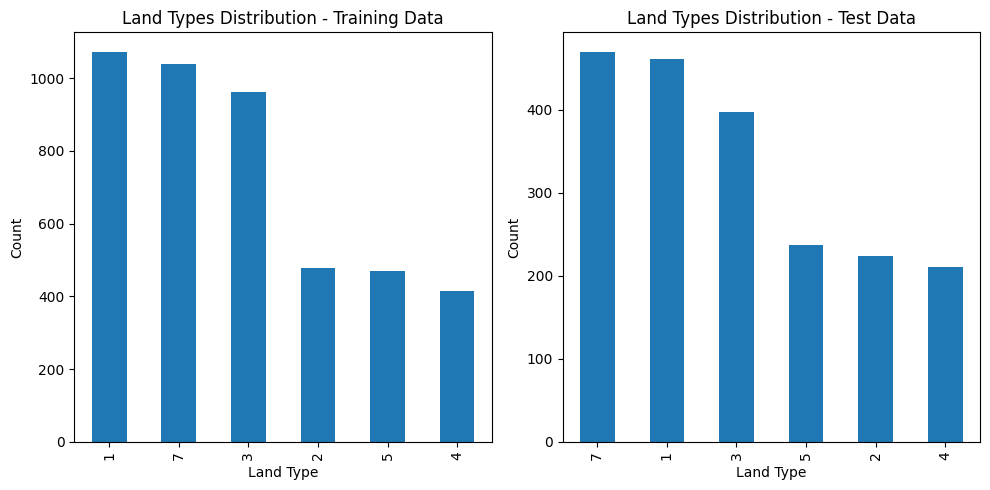

In [41]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
landsat_train['land_type'].value_counts().plot(kind='bar')
plt.title('Land Types Distribution - Training Data')
plt.xlabel('Land Type')
plt.ylabel('Count')

plt.subplot(1,2,2)
landsat_test['land_type'].value_counts().plot(kind='bar')
plt.title('Land Types Distribution - Test Data')
plt.xlabel('Land Type')
plt.ylabel('Count')
plt.tight_layout()

### Splitting Data into Train/Test

In [42]:
# split data into train and test
X_train = landsat_train.drop('land_type', axis=1)
X_test = landsat_test.drop('land_type', axis=1)
y_train = landsat_train['land_type']
y_test = landsat_test['land_type']

### Building the Pipeline

In [43]:
numeric_features = X_train.columns.tolist()

In [44]:
# create the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

### Executing the Model

In [45]:
# execute the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

In [46]:
y_pred = rf_pipeline.predict(X_test)

In [47]:
# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.99      0.99       461
           2       0.99      0.97      0.98       224
           3       0.89      0.95      0.92       397
           4       0.77      0.64      0.70       211
           5       0.92      0.91      0.91       237
           7       0.88      0.90      0.89       470

    accuracy                           0.91      2000
   macro avg       0.90      0.89      0.90      2000
weighted avg       0.91      0.91      0.91      2000



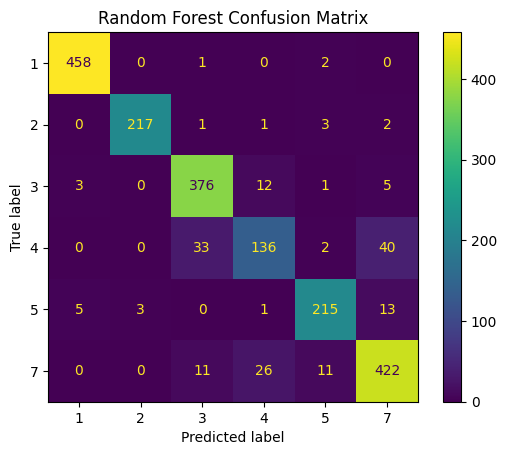

In [48]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Random Forest Confusion Matrix')
plt.show()

### Conclusion
The Random Forest Classifier model showed strong performance with an overall accuracy of 91%. Classes 1 and 2 had the strongest performance metrics with F1 scores of 0.99 and 0.98 respectively. Land types 3,5, and 7 were slightly weaker than land types 1 and 2 with F1 scores of 0.92, 0.91, and 0.89 respectively. The model performed the weakest on land type 4 with an F1 score of 0.70. In general however, the model performed well accross the different land types with a strong F1 score among most of them. Some land types had a support in the 200s whereas some other land types had support in the 300s and 400s which might mean that the data was somewhat imbalanced since some land types had more representation. Overall, the Random Forest Classifier model performed strongly at predicting land types from satellite data. It performed well across most land types. In particular it performed the strongest at land types 1 and 2. Before putting this model into production, it would be beneficial to increase the model's performance on land type 4. This model is suitable for predicting land types.

## Problem 2

### Reading the Data

### Splitting Data into Train/Test

### Building the Pipeline

In [18]:
# Build the pipeline for the AdaBoost Classifier
ada_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(random_state=42))
])

### Executing the Model

In [19]:
# Execute the model
ada_pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['top_left_r', 'top_left_g',
                                                   'top_left_infra1',
                                                   'top_left_infra2',
                                                   'top_middle_r',
                                                   'top_middle_g',
                                                   'top_middle_infra1',
                                                   'top_middle_infra2',
                                                   'top_right_r', 'top_right_g',
                                                   'top_right_infra1',
                                                   'top_right_infra2',
                                                   'middle_left_r',
                                                   'middle_left_g',
                                                   'middle_left_infra1',
                                                   'middle_left_infra2',
                                                   'central_pixel_r',
                                                   'central_pixel_g',
                                                   'central_pixel_infra1',
                                                   'central_pixel_infra2',
                                                   'middle_right_r',
                                                   'middle_right_g',
                                                   'middle_right_infra1',
                                                   'middle_right_infra2',
                                                   'bottom_left_r',
                                                   'bottom_left_g',
                                                   'bottom_left_infra1',
                                                   'bottom_left_infra2',
                                                   'bottom_middle_r',
                                                   'bottom_middle_g', ...])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

### Evaluating Model

In [20]:
# evaluate the model
ada_y_pred = ada_pipeline.predict(X_test)

In [21]:
# Display classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, ada_y_pred))

AdaBoost Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.76      0.84       461
           2       0.60      0.96      0.74       224
           3       0.77      0.67      0.72       397
           4       0.43      0.77      0.55       211
           5       0.42      0.20      0.27       237
           7       0.79      0.74      0.76       470

    accuracy                           0.69      2000
   macro avg       0.66      0.68      0.65      2000
weighted avg       0.72      0.69      0.69      2000



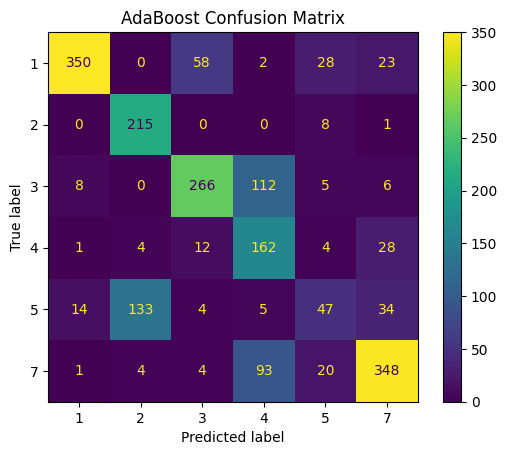

In [22]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, ada_y_pred)
plt.title('AdaBoost Confusion Matrix')
plt.show()

### Conclusion
The AdaBoost Classifier did not perform well at predicting land types from satellite data with an overall accuracy of 69%. It showed much weaker performance metrics compared to the Random Forest Classifier model. The model has widely varying precision scores across the different land types as well as inconsistent recall and F1 scores. In some land types such as land type 5, the model performed very weak with an F1 score of 0.27. In general, this model would need a lot of improvements before being put into production. As of right now, this model is not suitable for predicting land types.

## Problem 3

### Reading the Data

In [23]:
banknote_data = pd.read_csv('/content/gdrive/MyDrive/CS430/MLA1_BSR/banknote_authentication.csv')

### Statistical and Visual Exploration

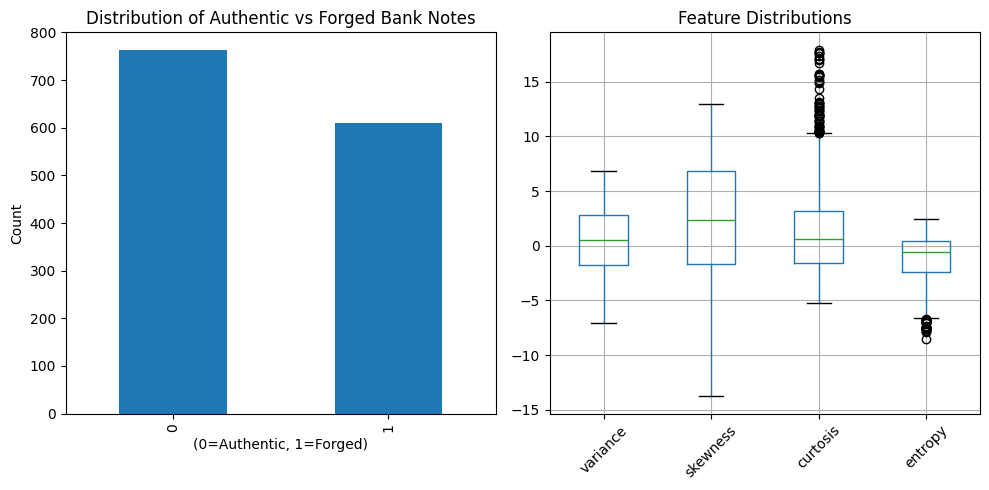

In [24]:
plt.figure(figsize=(10,5))
# Distribution of authentic vs forged notes
plt.subplot(1,2,1)
banknote_data['forgery'].value_counts().plot(kind='bar')
plt.title('Distribution of Authentic vs Forged Bank Notes')
plt.xlabel('(0=Authentic, 1=Forged)')
plt.ylabel('Count')

# Feature distributions
plt.subplot(1,2,2)
banknote_data.boxplot(column=['variance', 'skewness', 'curtosis', 'entropy'])
plt.title('Feature Distributions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Splitting Data into Train/Test

In [25]:
# Split the data into train and test
X = banknote_data.drop('forgery', axis=1)
y = banknote_data['forgery']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building the Pipeline

In [26]:
numeric_features = ['variance', 'skewness', 'curtosis', 'entropy']

In [27]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features)
    ])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


### Executing the Model

In [28]:
# Execute the model
rf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

### Evaluating Model

In [29]:
# Evaluate the model
y_pred = rf_pipeline.predict(X_test)

In [30]:
# Display classification report
print("Banknote Authentication Classification Report:")
print(classification_report(y_test, y_pred))

Banknote Authentication Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       148
           1       1.00      0.98      0.99       127

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



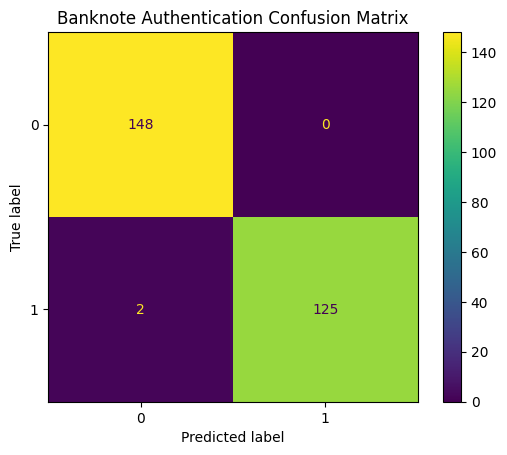

In [31]:
# Display confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Banknote Authentication Confusion Matrix')
plt.show()

### Conclusion
The Random Forest Classifier model performed very well at predicting banknote forgeries with an overall accuracy of 99%. The model showed consistently strong performance metrics between both the forged bank notes class and the authentic bank notes class. Both of these classes had an F1 score 99%. In addition, the support metric showed that the data was balanced between the two classes. In general, the Random Forest Classifier model showed strong performance metrics across the board. This model is very accurate and maintains consistent results in both classes which makes this model suitable for predicting bank note forgeries.